<p style = "font-size : 40px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;">Face Mask Detection</strong></p>

In [2]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

<a id = '2.0'></a>
<p style = "font-size : 30px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong> Dataset Collection</strong></p> 

In [34]:
webcam = cv2.VideoCapture(0) #Use camera 0
# labels_dict={0:'w->without mask',1:'m->mask',2:'Esc->exit'}
# color_dict={0:(0,0,255),1:(0,255,0)}
while True:
    (rval, im) = webcam.read()
    im = cv2.flip(im,1,1) #Flip to act as a mirror
    
    cv2.imshow("Image_LIVE", im)
    path_wo_mask = "C:\\Users\\jia\\Desktop\\FACE MASK\\Dataset\\train\\without_mask"
    path_mask = "C:\\Users\\jia\\Desktop\\FACE MASK\\Dataset\\train\\with_mask"
    
    start_name = len(os.listdir(path_mask))
    start_name_wo = len(os.listdir(path_wo_mask))
#     cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    key = cv2.waitKey(1)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break
    elif key == ord('w'):
        cv2.imwrite(path_wo_mask + "\\" + str(start_name_wo) + ".jpg", im)
        start_name_wo += 1
    elif key == ord('m'):
        cv2.imwrite(path_mask + "\\" + str(start_name) + ".jpg", im)
        start_name += 1
# Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()

<a id = '2.0'></a>
<p style = "font-size : 30px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong> Model</strong></p> 

In [3]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print("model compiled successfully")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dropout (Dropout)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                6

<a id = '1.0'></a>
<p style = "font-size : 30px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Data Pre-Processing</strong></p> 

In [4]:
TRAINING_DIR = "Dataset/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "Dataset/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))




Found 1508 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


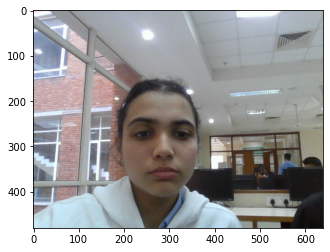

In [53]:
import cv2
import numpy as np
import matplotlib.image as mpimg

wm_img = "C:\\Users\\jia\\Desktop\\FACE MASK\\Dataset\\train\\without_mask\\657.jpg"
m_img = "C:\\Users\\jia\\Desktop\\FACE MASK\\Dataset\\train\\with_mask\\pra3.jpg"

im2 = mpimg.imread(wm_img)
im1 = mpimg.imread(m_img)

plt.imshow(im2)




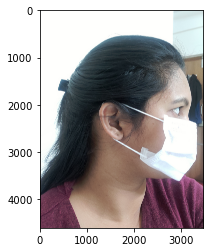

In [38]:
plt.imshow(im1)

In [5]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [6]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

C:\Users\jia\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
151/151 [==============================] - 116s 753ms/step - loss: 0.6091 - acc: 0.6837 - val_loss: 0.2539 - val_acc: 0.9124
INFO:tensorflow:Assets written to: model2-001.model\assets
Epoch 2/10
151/151 [==============================] - 114s 752ms/step - loss: 0.3668 - acc: 0.8488 - val_loss: 0.2205 - val_acc: 0.9124
INFO:tensorflow:Assets written to: model2-002.model\assets
Epoch 3/10
151/151 [==============================] - 115s 758ms/step - loss: 0.3510 - acc: 0.8601 - val_loss: 0.1860 - val_acc: 0.9021
INFO:tensorflow:Assets written to: model2-003.model\assets
Epoch 4/10
151/151 [==============================] - 115s 758ms/step - loss: 0.3283 - acc: 0.8654 - val_loss: 0.1417 - val_acc: 0.9691
INFO:tensorflow:Assets written to: model2-004.model\assets
Epoch 5/10
151/151 [==============================] - 78s 512ms/step - loss: 0.2929 - acc: 0.8806 - val_loss: 0.0935 - val_acc: 0.9691
INFO:tensorflow:Assets written to: model2-005.model\assets
Epoch 6/10
151/151 [======

<a id = '1.1'></a>
<p style = "font-size : 30px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Visualizing</strong></p> 

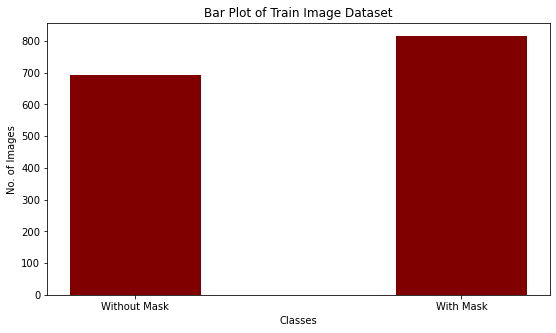

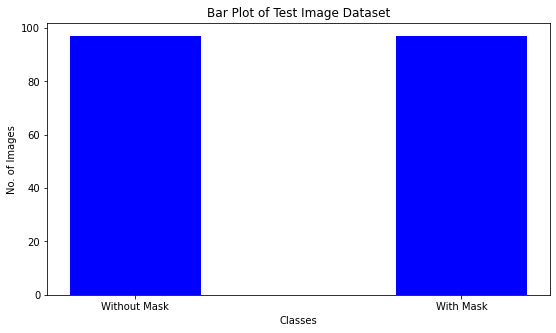

In [41]:
path_wo_mask = "C:\\Users\\jia\\Desktop\\FACE MASK\\Dataset\\train\\without_mask"
path_mask = "C:\\Users\\jia\\Desktop\\FACE MASK\\Dataset\\train\\with_mask"

x_labels = ["Without Mask", "With Mask"]
y_count = [len(os.listdir(path_wo_mask)), len(os.listdir(path_mask))]

fig = plt.figure(figsize = (9, 5))
plt.bar(x_labels, y_count, color = 'maroon', width = 0.4)

plt.xlabel("Classes")
plt.ylabel("No. of Images")
plt.title("Bar Plot of Train Image Dataset")

plt.show()

path_wo_mask = "C:\\Users\\jia\\Desktop\\FACE MASK\\Dataset\\test\\without_mask"
path_mask = "C:\\Users\\jia\\Desktop\\FACE MASK\\Dataset\\test\\with_mask"

x_labels = ["Without Mask", "With Mask"]
y_count = [len(os.listdir(path_wo_mask)), len(os.listdir(path_mask))]

fig = plt.figure(figsize = (9, 5))
plt.bar(x_labels, y_count, color = 'blue', width = 0.4)

plt.xlabel("Classes")
plt.ylabel("No. of Images")
plt.title("Bar Plot of Test Image Dataset")

plt.show()



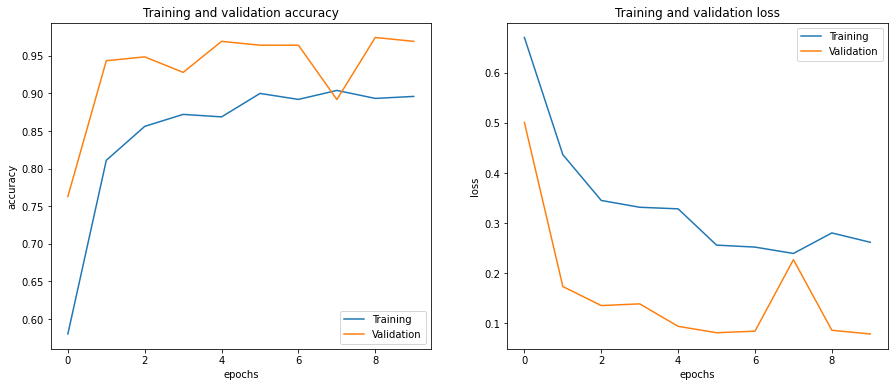

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(122)
plt.plot(loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

       loss       acc  val_loss   val_acc
0  0.670263  0.580239  0.500659  0.762887
1  0.436585  0.811008  0.173619  0.943299
2  0.345224  0.856101  0.135627  0.948454
3  0.331679  0.872016  0.139054  0.927835
4  0.328504  0.868700  0.094210  0.969072
5  0.256174  0.899867  0.081503  0.963918
6  0.252216  0.891910  0.084587  0.963918
7  0.239562  0.903846  0.227192  0.891753
8  0.280473  0.893236  0.086385  0.974227
9  0.261842  0.895889  0.078996  0.969072


<AxesSubplot:>

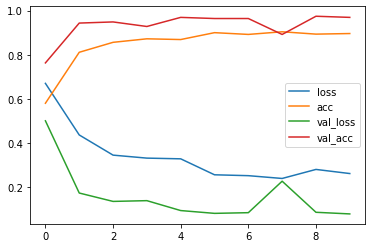

In [43]:
result=pd.DataFrame(history.history)
print(result)
result.plot()

<AxesSubplot:>

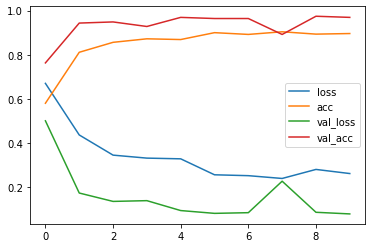

In [44]:
result.plot()

In [1]:
import cv2
import numpy as np
from keras.models import load_model
# model=load_model("./model-010.h5")

labels_dict={0:'without mask',1:'mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

size = 4
webcam = cv2.VideoCapture(0) #Use camera 0

# We load the xml file
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) #Flip to act as a mirror

    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(mini)

    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        #print(result)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    # Show the image
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break
# Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [2]:
import cv2
import numpy as np
from keras.models import load_model

# Load the model
model = load_model('keras_model.h5')

# CAMERA can be 0 or 1 based on default camera of your computer.
camera = cv2.VideoCapture(0)

# Grab the labels from the labels.txt file. This will be used later.
labels = open('labels.txt', 'r').readlines()

while True:
    # Grab the webcameras image.
    ret, image = camera.read()
    # Resize the raw image into (224-height,224-width) pixels.
    image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
    # Show the image in a window
    cv2.imshow('Webcam Image', image)
    # Make the image a numpy array and reshape it to the models input shape.
    image = np.asarray(image, dtype=np.float32).reshape(1, 224, 224, 3)
    # Normalize the image array
    image = (image / 127.5) - 1
    # Have the model predict what the current image is. Model.predict
    # returns an array of percentages. Example:[0.2,0.8] meaning its 20% sure
    # it is the first label and 80% sure its the second label.
    probabilities = model.predict(image)
    # Print what the highest value probabilitie label
    print(labels[np.argmax(probabilities)])
    # Listen to the keyboard for presses.
    keyboard_input = cv2.waitKey(1)
    # 27 is the ASCII for the esc key on your keyboard.
    if keyboard_input == 27:
        break

camera.release()
cv2.destroyAllWindows()

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

0 with_mask

1 without_mask

0 with_mask

1 without_mask

1 without_mask

0 with_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask

1 without_mask